In [115]:
# Importing libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import warnings
warnings.filterwarnings("ignore")

In [116]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [117]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [118]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [119]:
# Null value check
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [120]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

No null values in the train and test data

In [121]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [122]:
#separating continuous and categorical variables
cat_var = ["Gender","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage"]
con_var = list(set(train.columns).difference(cat_var+["Response"]))

In [123]:
train.Response.value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

Around 12% have given positive response

Text(0.5, 1.0, 'Class Count')

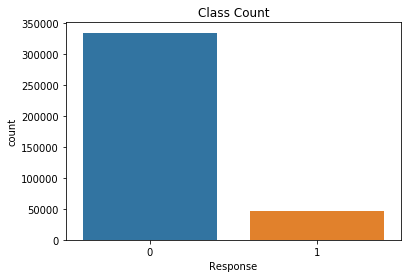

In [124]:
sns.countplot(train.Response)
plt.title("Class Count")

In [125]:
for feature in train.columns: 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(train[feature].unique()))
        print(pd.Categorical(train[feature].nunique()))



feature: id
[1, 2, 3, 4, 5, ..., 381105, 381106, 381107, 381108, 381109]
Length: 381109
Categories (381109, int64): [1, 2, 3, 4, ..., 381106, 381107, 381108, 381109]
[381109]
Categories (1, int64): [381109]


feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[2]
Categories (1, int64): [2]


feature: Age
[44, 76, 47, 21, 29, ..., 83, 81, 80, 82, 85]
Length: 66
Categories (66, int64): [20, 21, 22, 23, ..., 82, 83, 84, 85]
[66]
Categories (1, int64): [66]


feature: Driving_License
[1, 0]
Categories (2, int64): [0, 1]
[2]
Categories (1, int64): [2]


feature: Region_Code
[28.0, 3.0, 11.0, 41.0, 33.0, ..., 4.0, 51.0, 42.0, 1.0, 52.0]
Length: 53
Categories (53, float64): [0.0, 1.0, 2.0, 3.0, ..., 49.0, 50.0, 51.0, 52.0]
[53]
Categories (1, int64): [53]


feature: Previously_Insured
[0, 1]
Categories (2, int64): [0, 1]
[2]
Categories (1, int64): [2]


feature: Vehicle_Age
['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['1-2 Year', '< 1 Year', '> 2

In [126]:
for column in train.columns:
    if train[column].dtype == 'object':
        print(column.upper(),': ',train[column].nunique())
        print(train[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    175020
Male      206089
Name: Gender, dtype: int64


VEHICLE_AGE :  3
> 2 Years     16007
< 1 Year     164786
1-2 Year     200316
Name: Vehicle_Age, dtype: int64


VEHICLE_DAMAGE :  2
No     188696
Yes    192413
Name: Vehicle_Damage, dtype: int64




In [127]:
# Encoding
for feature in train.columns: 
    if train[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(train[feature].unique()))
        print(pd.Categorical(train[feature].unique()).codes)
        train[feature] = pd.Categorical(train[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Vehicle_Age
['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['1-2 Year', '< 1 Year', '> 2 Years']
[2 0 1]


feature: Vehicle_Damage
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


In [128]:
dups = train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

train[dups]

Number of duplicate rows = 0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int8   
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int8   
 7   Vehicle_Damage        381109 non-null  int8   
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), int8(3)
memory usage: 27.3 MB


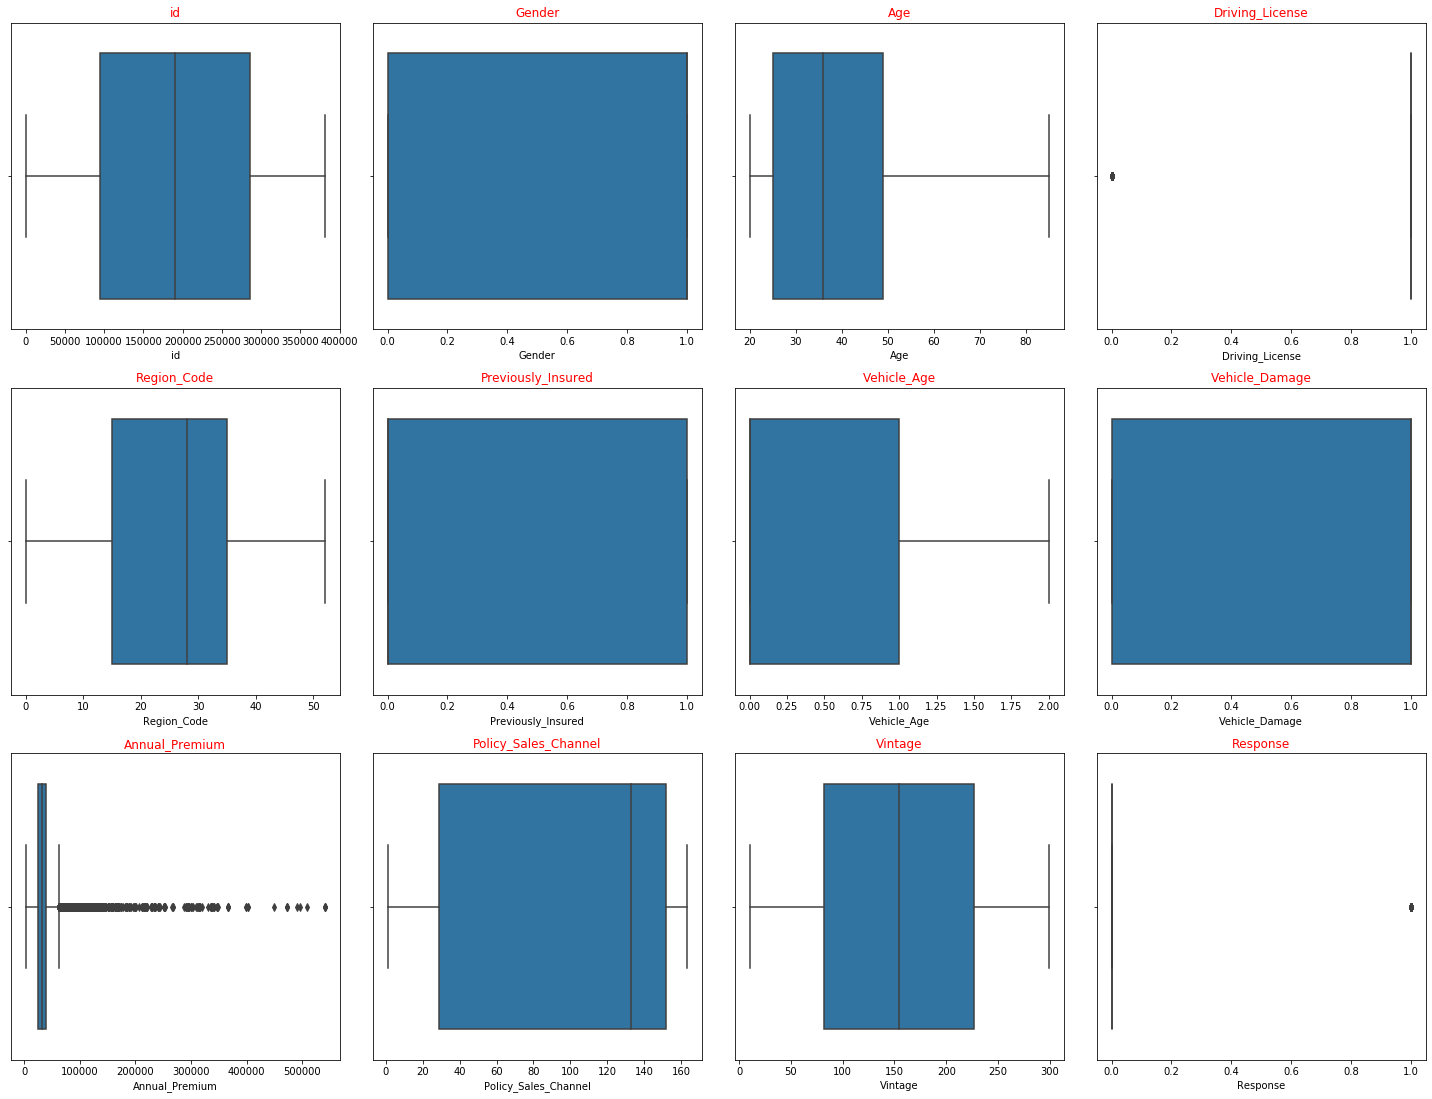

In [130]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(train.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(train[train.columns[i]])
    ax.set_title(train.columns[i],color='Red')
plt.tight_layout()
plt.show()

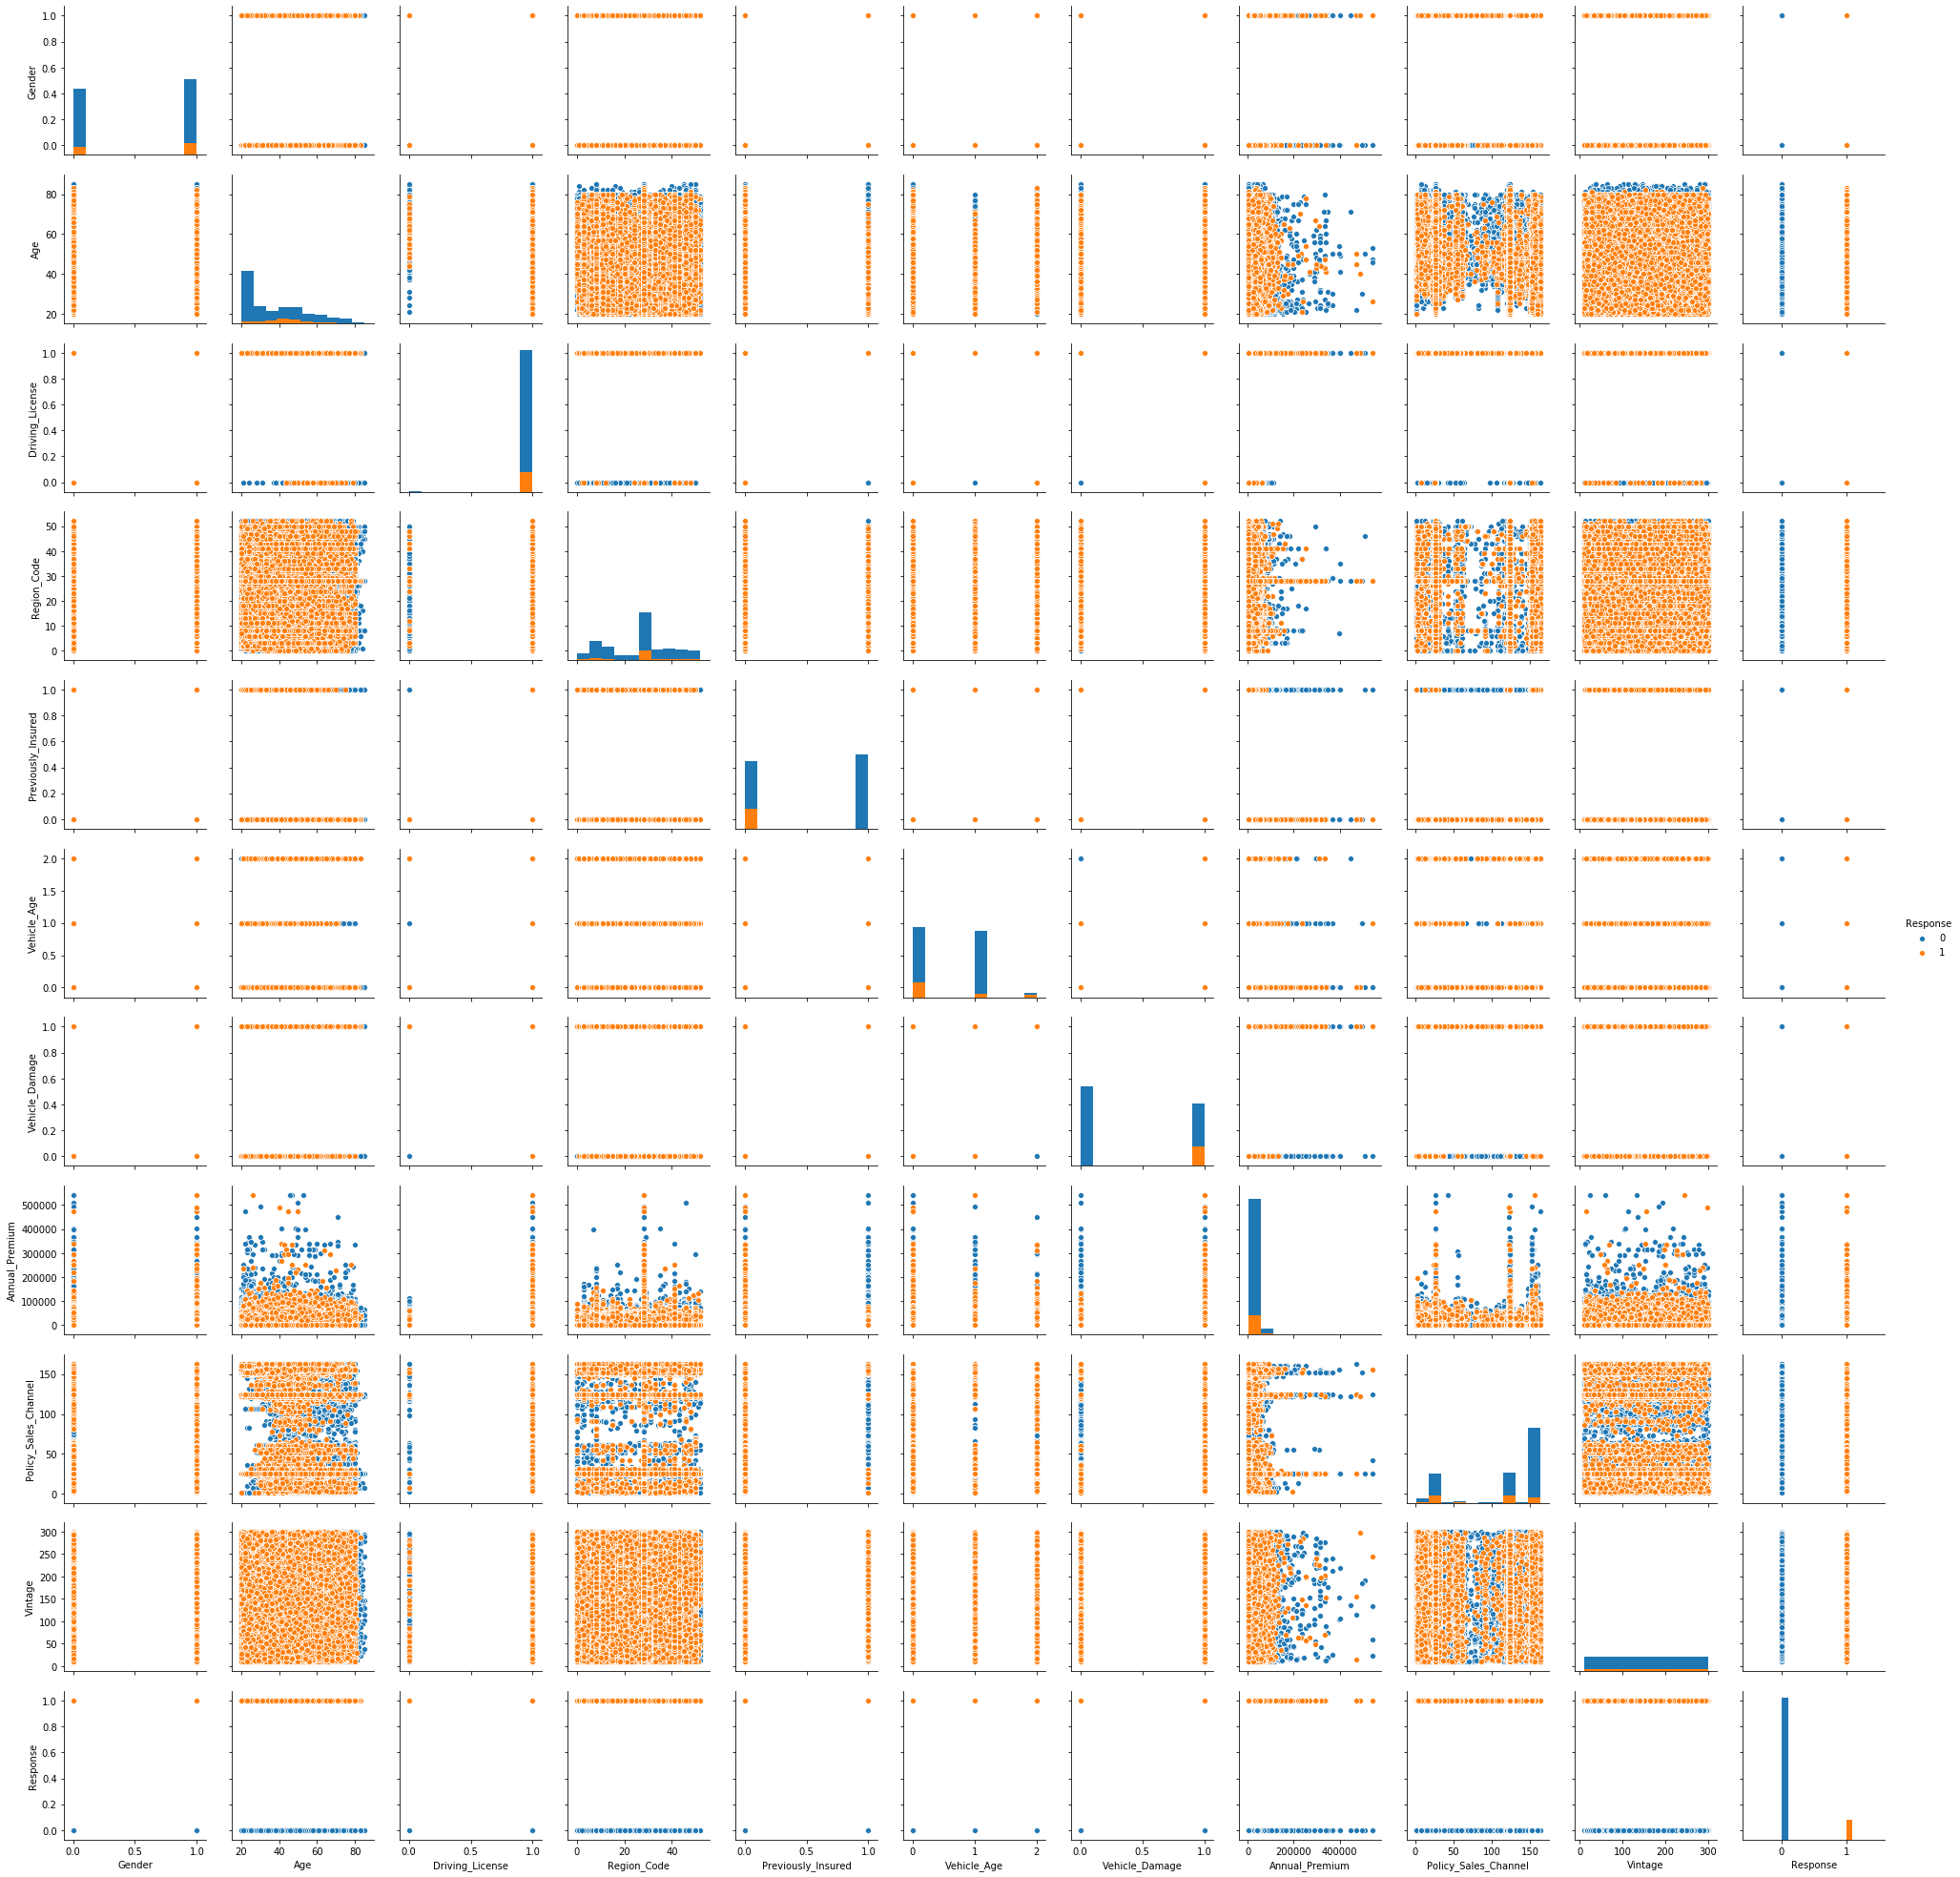

In [21]:
sns.pairplot(train, hue='Response', diag_kind='hist')
plt.show()

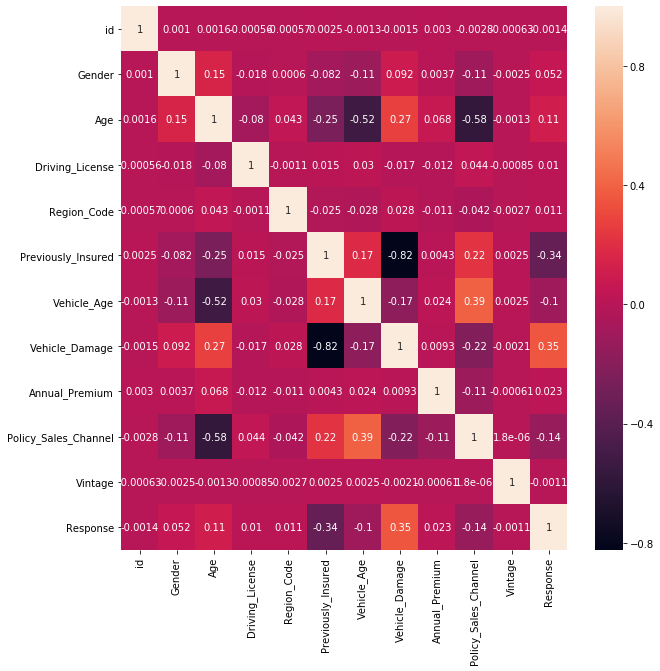

In [131]:
#Checking correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

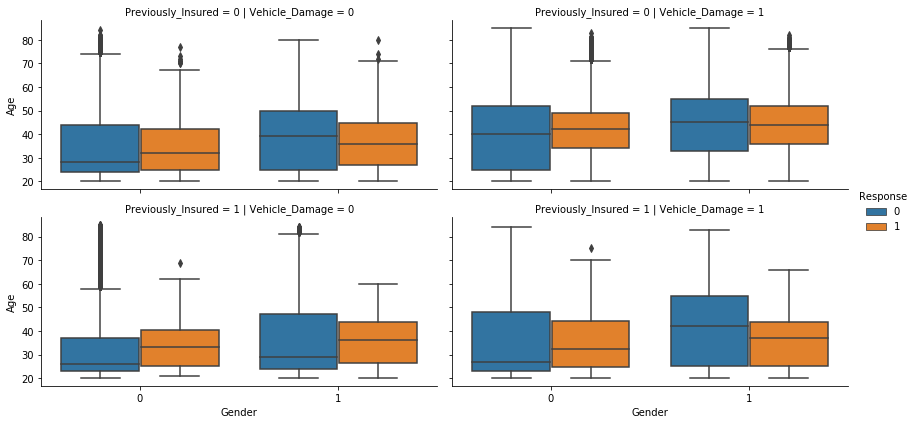

In [132]:
sns.catplot('Gender', 'Age',hue='Response', row = 'Previously_Insured',col='Vehicle_Damage',data=train, kind='box', height=3, aspect=2)
plt.show()


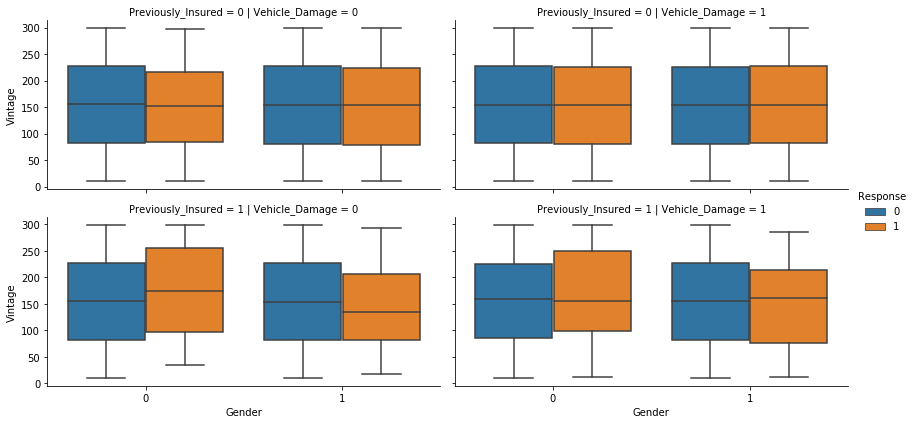

In [133]:
sns.catplot('Gender', 'Vintage',hue='Response', row = 'Previously_Insured',col='Vehicle_Damage',data=train, kind='box', height=3, aspect=2)
plt.show()

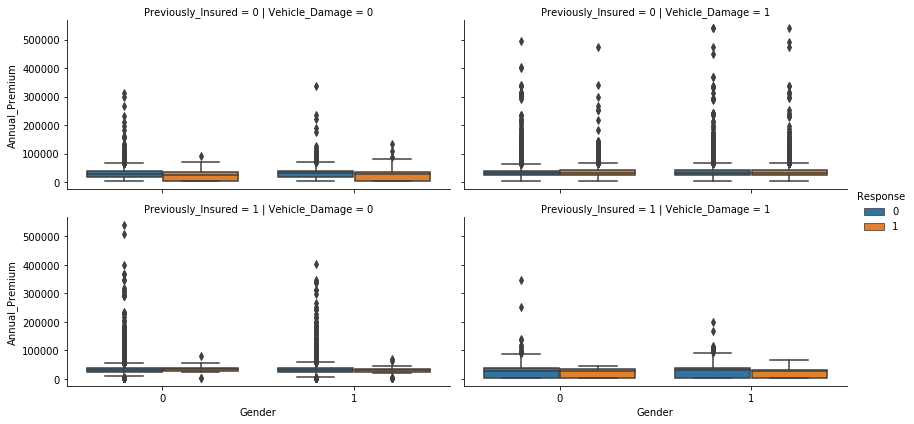

In [134]:
sns.catplot('Gender', 'Annual_Premium',hue='Response', row = 'Previously_Insured',col='Vehicle_Damage',data=train, kind='box', height=3, aspect=2)
plt.show()

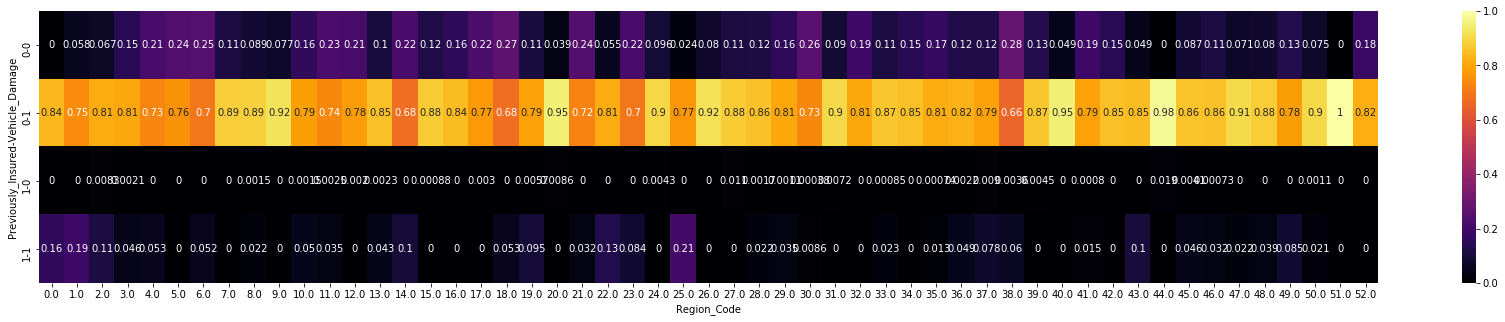

In [135]:
plt.figure(figsize=(30,5))
sns.heatmap(pd.crosstab([train['Previously_Insured'], train['Vehicle_Damage']], train['Region_Code'],
                        values=train['Response'], aggfunc='mean', normalize='columns'), annot=True, cmap='inferno')
plt.show()

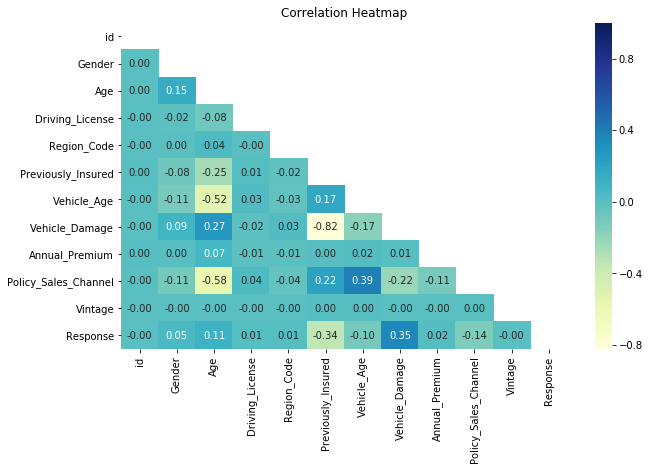

In [136]:
# Correlation heatmap
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', mask=mask)
plt.title("Correlation Heatmap")
plt.show()

Current Age/ Vintage/ Annual Premium distributions are not helping very much so we will try mean transformation

In [137]:
train.skew()

id                      9.443274e-16
Gender                 -1.635904e-01
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Vehicle_Age             5.896823e-01
Vehicle_Damage         -1.950724e-02
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

We see there is a skewness in the data so we apply log transformation to remove skewness

In [138]:
train['log_premium'] = np.log(train.Annual_Premium)
train['log_age'] = np.log(train.Age)
test['log_premium'] = np.log(test.Annual_Premium)
test['log_age'] = np.log(test.Age)

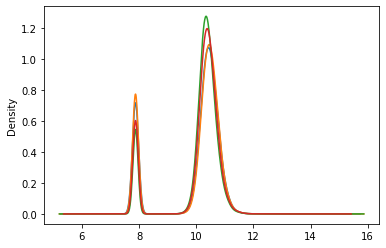

In [139]:
train.groupby(['Previously_Insured','Gender'])['log_premium'].plot(kind='kde')
plt.show()

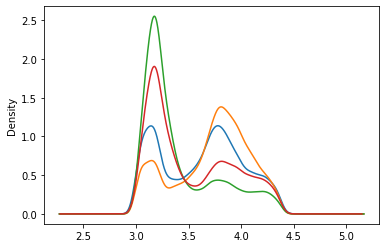

In [140]:
train.groupby(['Previously_Insured','Gender'])['log_age'].plot(kind='kde')
plt.show()

In [141]:
for column in test.columns:
    if test[column].dtype == 'object':
        print(column.upper(),': ',test[column].nunique())
        print(test[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    58801
Male      68236
Name: Gender, dtype: int64


VEHICLE_AGE :  3
> 2 Years     5319
< 1 Year     55019
1-2 Year     66699
Name: Vehicle_Age, dtype: int64


VEHICLE_DAMAGE :  2
No     63202
Yes    63835
Name: Vehicle_Damage, dtype: int64




In [142]:
# Encoding
for feature in test.columns: 
    if test[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(test[feature].unique()))
        print(pd.Categorical(test[feature].unique()).codes)
        test[feature] = pd.Categorical(test[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Vehicle_Age
['< 1 Year', '1-2 Year', '> 2 Years']
Categories (3, object): ['1-2 Year', '< 1 Year', '> 2 Years']
[1 0 2]


feature: Vehicle_Damage
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  int8   
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  int8   
 7   Vehicle_Damage        127037 non-null  int8   
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
 11  log_premium           127037 non-null  float64
 12  log_age               127037 non-null  float64
dtypes: float64(5), int64(5), int8(3)
memory usage: 10.1 MB


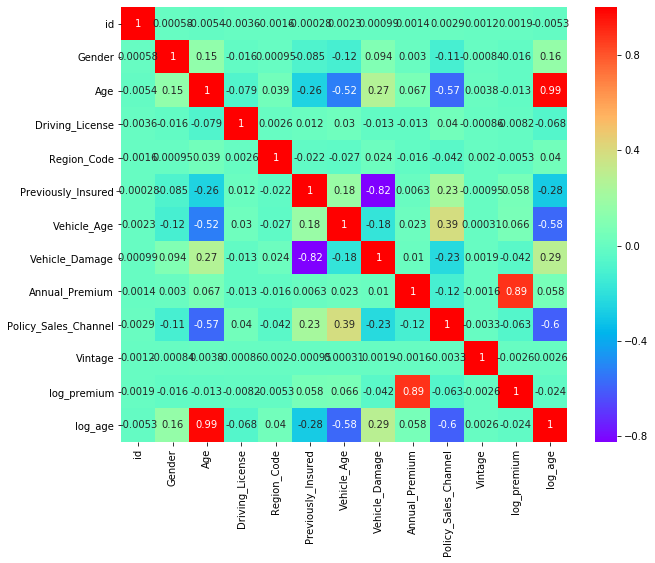

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(test.corr(),annot=True, cmap='rainbow')
plt.show()

In [145]:
train.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_premium,log_age
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,-0.001345,-0.001507,0.003027,-0.002837,-0.000630,-0.001368,0.003093,0.001234
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440,-0.013636,0.156840
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147,-0.009367,0.985490
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155,-0.006576,-0.069409
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570,-0.000499,0.043335
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170,0.056075,-0.279496
Vehicle_Age,-0.001345,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078,0.065211,-0.573752
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400,-0.040709,0.290388
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575,0.875367,0.058379
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042,-0.061424,-0.599662


In [146]:
test.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,log_premium,log_age
id,1.000000,0.000576,-0.005364,-0.003581,-0.001574,-0.000281,0.002350,0.000988,0.001386,0.002911,0.001225,0.001854,-0.005316
Gender,0.000576,1.000000,0.149650,-0.015621,0.000952,-0.085088,-0.115935,0.094250,0.002968,-0.112806,-0.000842,-0.015962,0.160901
Age,-0.005364,0.149650,1.000000,-0.079374,0.038878,-0.258282,-0.524189,0.270706,0.067038,-0.574722,0.003761,-0.012664,0.985520
Driving_License,-0.003581,-0.015621,-0.079374,1.000000,0.002596,0.012455,0.029533,-0.013101,-0.012664,0.040185,-0.000858,-0.008177,-0.067882
Region_Code,-0.001574,0.000952,0.038878,0.002596,1.000000,-0.022001,-0.026971,0.024151,-0.016349,-0.041618,0.001984,-0.005269,0.040209
Previously_Insured,-0.000281,-0.085088,-0.258282,0.012455,-0.022001,1.000000,0.177841,-0.823464,0.006327,0.227189,-0.000953,0.058431,-0.284006
Vehicle_Age,0.002350,-0.115935,-0.524189,0.029533,-0.026971,0.177841,1.000000,-0.177244,0.023207,0.389822,0.000312,0.065920,-0.575019
Vehicle_Damage,0.000988,0.094250,0.270706,-0.013101,0.024151,-0.823464,-0.177244,1.000000,0.009968,-0.230298,0.001879,-0.042107,0.293950
Annual_Premium,0.001386,0.002968,0.067038,-0.012664,-0.016349,0.006327,0.023207,0.009968,1.000000,-0.116452,-0.001607,0.885582,0.057667
Policy_Sales_Channel,0.002911,-0.112806,-0.574722,0.040185,-0.041618,0.227189,0.389822,-0.230298,-0.116452,1.000000,-0.003257,-0.063221,-0.596867


In [147]:
train.cov()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_premium,log_age
id,1.210370e+10,54.778433,2664.269023,-2.858662,-832.701442,134.688377,-85.511766,-82.920398,5.732000e+06,-16918.209720,-5801.585459,-49.360746,342.033751,53.072894
Gender,5.477843e+01,0.248339,1.125063,-0.000422,0.003983,-0.020343,-0.032423,0.022824,3.150459e+01,-3.002602,-0.104946,0.008570,-0.006830,0.030554
Age,2.664269e+03,1.125063,240.610076,-0.057063,8.736897,-1.968358,-4.680339,2.074848,1.802462e+04,-485.830665,-1.640618,0.565383,-0.146040,5.975771
Driving_License,-2.858662e+00,-0.000422,-0.057063,0.002126,-0.000659,0.000344,0.000804,-0.000383,-9.450063e+00,0.109297,-0.003272,0.000154,-0.000305,-0.001251
Region_Code,-8.327014e+02,0.003983,8.736897,-0.000659,175.029937,-0.162546,-0.212775,0.186764,-2.411074e+03,-30.420098,-3.043737,0.045858,-0.006638,0.224122
Previously_Insured,1.346884e+02,-0.020343,-1.968358,0.000344,-0.162546,0.248254,0.050309,-0.205306,3.661091e+01,5.924870,0.105757,-0.055745,0.028081,-0.054439
Vehicle_Age,-8.551177e+01,-0.032423,-4.680339,0.000804,-0.212775,0.050309,0.333735,-0.050326,2.352398e+02,12.166913,0.120053,-0.019717,0.037864,-0.129571
Vehicle_Damage,-8.292040e+01,0.022824,2.074848,-0.000383,0.186764,-0.205306,-0.050326,0.249977,8.046168e+01,-6.080780,-0.086360,0.058107,-0.020457,0.056756
Annual_Premium,5.732000e+06,31.504588,18024.623623,-9.450063,-2411.073702,36.610909,235.239818,80.461676,2.962927e+08,-105661.774754,-876.271052,127.429848,15144.383540,392.828553
Policy_Sales_Channel,-1.691821e+04,-3.002602,-485.830665,0.109297,-30.420098,5.924870,12.166913,-6.080780,-1.056618e+05,2938.073050,0.008390,-2.471522,-3.346346,-12.706404


In [148]:
test.cov()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,log_premium,log_age
id,1.344877e+09,10.527347,-3042.277425,-5.666583,-762.372879,-5.131726,49.765618,18.115920,8.610644e+05,5805.339652,3759.053032,68.281017,-76.077903
Gender,1.052735e+01,0.248623,1.154042,-0.000336,0.006271,-0.021145,-0.033382,0.023497,2.507503e+01,-3.058280,-0.035144,-0.007995,0.031310
Age,-3.042277e+03,1.154042,239.191404,-0.052973,7.942866,-1.990892,-4.681467,2.093325,1.756893e+04,-483.285532,4.866644,-0.196741,5.948214
Driving_License,-5.666583e+00,-0.000336,-0.052973,0.001862,0.001480,0.000268,0.000736,-0.000283,-9.260394e+00,0.094286,-0.003098,-0.000354,-0.001143
Region_Code,-7.623729e+02,0.006271,7.942866,0.001480,174.501878,-0.144853,-0.205740,0.159517,-3.659740e+03,-29.891624,2.192212,-0.069923,0.207289
Previously_Insured,-5.131726e+00,-0.021145,-1.990892,0.000268,-0.144853,0.248405,0.051184,-0.205206,5.343770e+01,6.156610,-0.039754,0.029254,-0.055240
Vehicle_Age,4.976562e+01,-0.033382,-4.681467,0.000736,-0.205740,0.051184,0.333459,-0.051175,2.270883e+02,12.239426,0.015069,0.038238,-0.129584
Vehicle_Damage,1.811592e+01,0.023497,2.093325,-0.000283,0.159517,-0.205206,-0.051175,0.249996,8.445361e+01,-6.260815,0.078594,-0.021149,0.057357
Annual_Premium,8.610644e+05,25.075033,17568.926708,-9.260394,-3659.739993,53.437696,227.088296,84.453614,2.871431e+08,-107292.522314,-2277.522015,15074.360282,381.353317
Policy_Sales_Channel,5.805340e+03,-3.058280,-483.285532,0.094286,-29.891624,6.156610,12.239426,-6.260815,-1.072925e+05,2956.288865,-14.815940,-3.452989,-12.664844


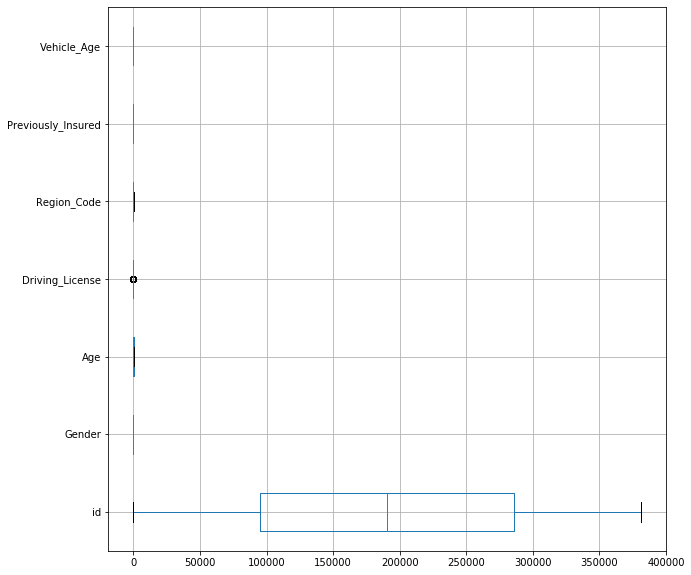

In [149]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
train.iloc[:,:7].boxplot(vert=0)
plt.show()

In [150]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_premium,log_age
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,10.607921,3.784190
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,10.420375,4.330733
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,10.553049,3.850148
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,10.261826,3.044522
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,10.221796,3.367296


In [151]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,log_premium,log_age
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53,10.485312,3.218876
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111,10.427091,3.688879
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199,10.597884,3.850148
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187,10.528249,3.178054
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297,10.986935,3.295837


In [155]:
from sklearn.preprocessing import LabelEncoder
combine_set=pd.concat([train,test])
le=LabelEncoder()
combine_set['Gender']=le.fit_transform(combine_set['Gender'])
combine_set['Vehicle_Damage']=le.fit_transform(combine_set['Vehicle_Damage'])

fe=combine_set.groupby('Vehicle_Age').size()/len(combine_set)
combine_set['Vehicle_Age']=combine_set['Vehicle_Age'].apply(lambda x: fe[x])#can even try Label encoding or OHE

combine_set.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_premium,log_age
0,1,1,44,1,28.0,0,0.041968,1,40454.0,26.0,217,1.0,10.607921,3.784190
1,2,1,76,1,3.0,0,0.525469,0,33536.0,26.0,183,0.0,10.420375,4.330733
2,3,1,47,1,28.0,0,0.041968,1,38294.0,26.0,27,1.0,10.553049,3.850148
3,4,1,21,1,11.0,1,0.432563,0,28619.0,152.0,203,0.0,10.261826,3.044522
4,5,0,29,1,41.0,1,0.432563,0,27496.0,152.0,39,0.0,10.221796,3.367296


In [157]:
#Data set Preparation
#Data set Preparation
train_df=combine_set[combine_set['Response'].isnull()==False]
test_df=combine_set[combine_set['Response'].isnull()==True]
X=train_df.drop(['id','Response'],axis=1)
y=train_df['Response'] 
X_main_test=test_df.drop(['id','Response'],axis=1)

In [158]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [159]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [160]:
logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')

In [161]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [162]:
## Performance Matrix on train data set
y_train_predict = logit_model.predict(X_train)
model_score = logit_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.877049725187261
[[250688      0]
 [ 35143      0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    250688
         1.0       0.00      0.00      0.00     35143

    accuracy                           0.88    285831
   macro avg       0.44      0.50      0.47    285831
weighted avg       0.77      0.88      0.82    285831



Text(0.5, 1, 'Confusion Matrix for training data of Logistic Regression model')

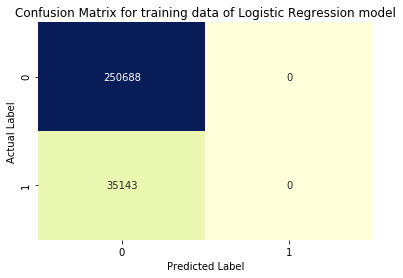

In [163]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of Logistic Regression model')

AUC for Logistic Regression training dataset: 0.841


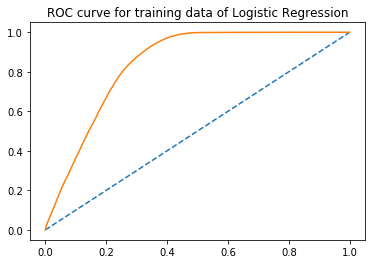

In [164]:
# predict probabilities
probs = logit_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_logit = roc_auc_score(y_train, probs)
print('AUC for Logistic Regression training dataset: %.3f' % train_auc_logit)
# calculate roc curve
train_fpr_logit, train_tpr_logit, train_thresholds_logit = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of Logistic Regression')
plt.plot(train_fpr_logit, train_tpr_logit)

In [165]:
## Performance Matrix on test data set
y_test_predict = logit_model.predict(X_test)
model_score = logit_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8785973677029325
[[83711     0]
 [11567     0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     83711
         1.0       0.00      0.00      0.00     11567

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



Text(0.5, 1, 'Confusion Matrix for testing data of Logistic Regression model')

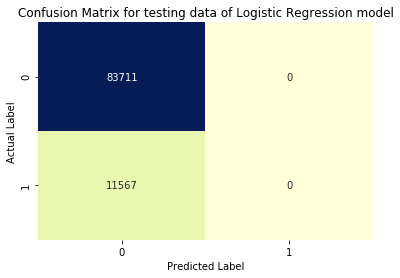

In [166]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of Logistic Regression model')

AUC for Logistic Regression testing dataset: 0.842


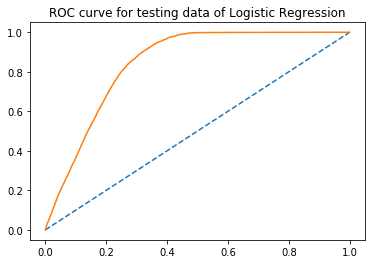

In [167]:
# predict probabilities
probs2 = logit_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
test_auc_logit = roc_auc_score(y_test, probs2)
print('AUC for Logistic Regression testing dataset: %.3f' % test_auc_logit)
# calculate roc curve
test_fpr_logit, test_tpr_logit, test_thresholds_logit = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of Logistic Regression')
plt.plot(test_fpr_logit, test_tpr_logit)

In [168]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
## Performance Matrix on train data set
y_train_predict2 = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict2))
print(metrics.classification_report(y_train, y_train_predict2))

0.8847745695883231
[[246971   3717]
 [ 29218   5925]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94    250688
         1.0       0.61      0.17      0.26     35143

    accuracy                           0.88    285831
   macro avg       0.75      0.58      0.60    285831
weighted avg       0.86      0.88      0.85    285831



Text(0.5, 1, 'Confusion Matrix for training data of KNN model')

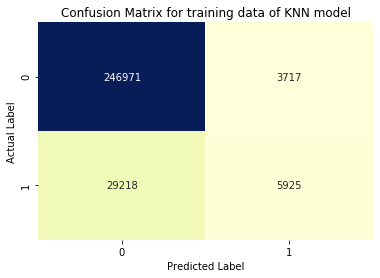

In [170]:
sns.heatmap(confusion_matrix(y_train, y_train_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of KNN model')

AUC for KNN trainnig dataset: 0.873


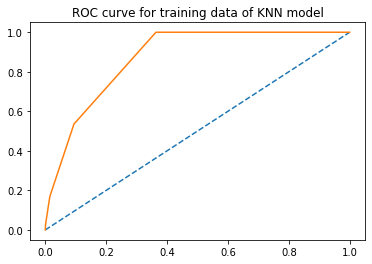

In [171]:
# predict probabilities
probs5 = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
train_auc_KNN = roc_auc_score(y_train, probs5)
print('AUC for KNN trainnig dataset: %.3f' % train_auc_KNN)
# calculate roc curve
train_fpr_KNN, train_tpr_KNN, train_thresholds_KNN = roc_curve(y_train, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of KNN model')
plt.plot(train_fpr_KNN, train_tpr_KNN)

In [172]:
## Performance Matrix on test data set
y_test_predict2 = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict2))
print(metrics.classification_report(y_test, y_test_predict2))

0.8604189844455173
[[81304  2407]
 [10892   675]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     83711
         1.0       0.22      0.06      0.09     11567

    accuracy                           0.86     95278
   macro avg       0.55      0.51      0.51     95278
weighted avg       0.80      0.86      0.82     95278



Text(0.5, 1, 'Confusion Matrix for testing data of KNN model')

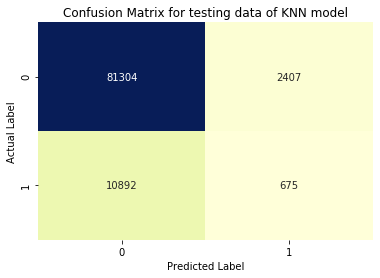

In [173]:
sns.heatmap(confusion_matrix(y_test, y_test_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of KNN model')

AUC for KNN testing dataset: 0.596


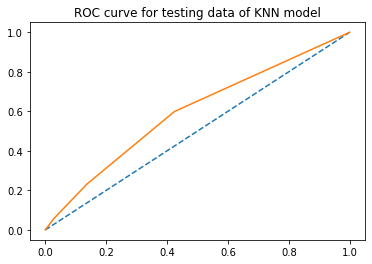

In [174]:
# predict probabilities
probs6 = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs6 = probs6[:, 1]
# calculate AUC
test_auc_KNN = roc_auc_score(y_test, probs6)
print('AUC for KNN testing dataset: %.3f' % test_auc_KNN)
# calculate roc curve
test_fpr_KNN, test_tpr_KNN, test_thresholds_KNN = roc_curve(y_test, probs6)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of KNN model')
plt.plot(test_fpr_KNN, test_tpr_KNN)

In [175]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [176]:
## Performance Matrix on train data set
y_train_predict3 = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict3))
print(metrics.classification_report(y_train, y_train_predict3))

0.8275414493179536
[[225463  25225]
 [ 24069  11074]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90    250688
         1.0       0.31      0.32      0.31     35143

    accuracy                           0.83    285831
   macro avg       0.60      0.61      0.61    285831
weighted avg       0.83      0.83      0.83    285831



Text(0.5, 1, 'Confusion Matrix for training data of NaiveBayes model')

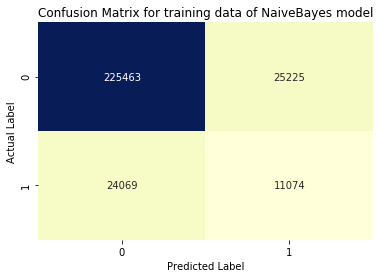

In [177]:
sns.heatmap(confusion_matrix(y_train, y_train_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data of NaiveBayes model')

AUC for NaivaBayes training dataset: 0.817


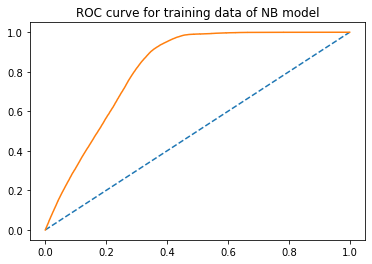

In [178]:
# predict probabilities
probs7 = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs7 = probs7[:, 1]
# calculate AUC
train_auc_NB = roc_auc_score(y_train, probs7)
print('AUC for NaivaBayes training dataset: %.3f' % train_auc_NB)
# calculate roc curve
train_fpr_NB, train_tpr_NB, train_thresholds_NB = roc_curve(y_train, probs7)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for training data of NB model')
plt.plot(train_fpr_NB, train_tpr_NB)

In [179]:
## Performance Matrix on test data set
y_test_predict3 = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict3))
print(metrics.classification_report(y_test, y_test_predict3))

0.83008669367535
[[75455  8256]
 [ 7933  3634]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     83711
         1.0       0.31      0.31      0.31     11567

    accuracy                           0.83     95278
   macro avg       0.61      0.61      0.61     95278
weighted avg       0.83      0.83      0.83     95278



Text(0.5, 1, 'Confusion Matrix for testing data of NaiveBayes model')

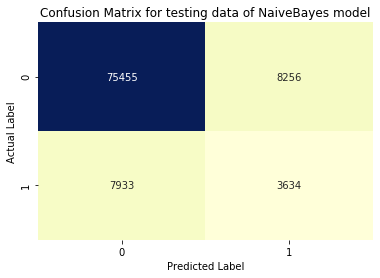

In [180]:
sns.heatmap(confusion_matrix(y_test, y_test_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for testing data of NaiveBayes model')

AUC for NaiveBayes testing dataset: 0.818


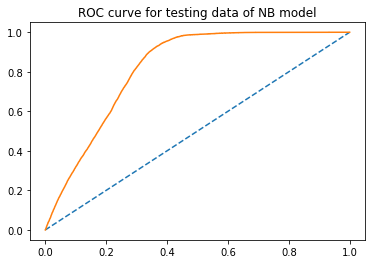

In [181]:
# predict probabilities
probs8 = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs8 = probs8[:, 1]
# calculate AUC
test_auc_NB = roc_auc_score(y_test, probs8)
print('AUC for NaiveBayes testing dataset: %.3f' % test_auc_NB)
# calculate roc curve
test_fpr_NB, test_tpr_NB, test_thresholds_NB = roc_curve(y_test, probs8)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC curve for testing data of NB model')
plt.plot(test_fpr_NB, test_tpr_NB)

In [182]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lg.fit(X_train,y_train)
print(roc_auc_score(y_val,lg.predict_proba(X_val)[:,1]))

0.8463463881237082


In [185]:
# Submission file
submission_df=pd.read_csv('sample_submission_iA3afxn.csv')
submission_df['Response']=np.array(lg.predict_proba(X_main_test)[:,1])

In [186]:
submission_df.to_csv('main_test.csv',index=False)
submission_df.head(5)

,id,Response
0,381110,0.006813
1,381111,0.774647
2,381112,0.756893
3,381113,0.029582
4,381114,0.001768
